In [1]:
import xarray as xr 
import numpy as np
import matplotlib.pyplot as plt
import cftime

import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback')
import functions.data_wrangling as data
import functions.eddy_feedback as ef

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

### CNRM-CM6-1

CNRM-CM6-1 DJF Feedback: 0.2733
CNRM-CM6-1 JAS Feedback: 0.2386


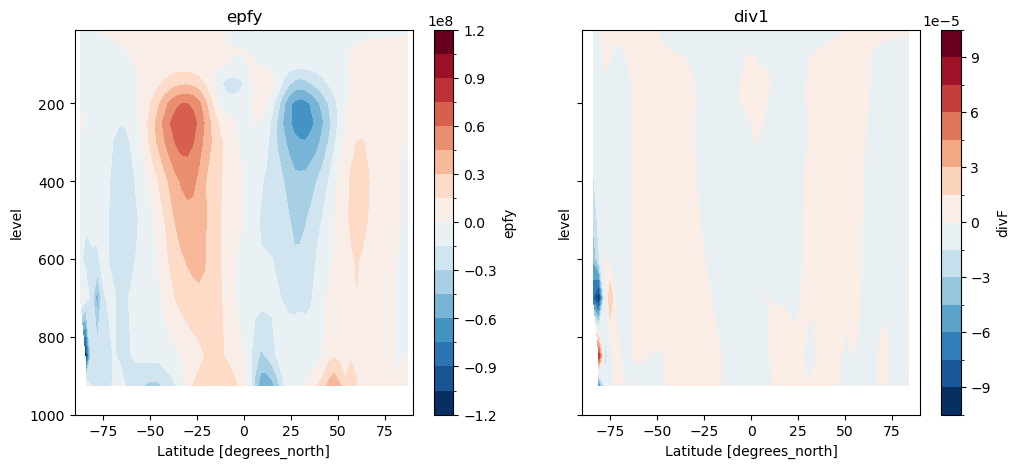

In [22]:
# # import data and do preliminary alterations
# cnrm_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/CNRM-CM6-1/*.nc', 
#                                 combine='nested', concat_dim='ens_ax', parallel=True)
# cnrm_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/ua/CNRM-CM6-1/*.nc', 
#                                 combine='nested', concat_dim='ens_ax', parallel=True)

# # remove spin-up on epfy
# cnrm_epfy, cnrm_ua = cnrm_epfy.sel(time=slice('2000-06', '2001-05')), cnrm_ua.sel(time=slice('2000-06', '2001-05'))
# # change chunks
# cnrm_ua = cnrm_ua.chunk({'ens_ax':50, 'lat':64, 'time': 12, 'plev': 23})
# cnrm_epfy = cnrm_epfy.chunk({'ens_ax':50, 'lat':64, 'time': 12, 'plev': 23})

# # # create dataset and interpolate
# cnrm_ds = xr.Dataset( {'ubar': cnrm_ua.ua.mean('lon'), 'epfy': cnrm_epfy.epfy.isel(lon=0)})
# cnrm_ds = cnrm_ds.rename({'plev': 'level'})
# cnrm_ds['level'] = cnrm_ds['level'] / 100
# cnrm_ds = cnrm_ds.sel( level=slice(None, None, -1) )
# cnrm_ds = cnrm_ds.interp(lat=np.arange(-90,93,3))
# # subset epfy to match SRIP datasets
# cnrm_ds = cnrm_ds.where(cnrm_ds.level < 1000.)
# cnrm_ds = cnrm_ds.where(cnrm_ds.level > 1.)
# cnrm_ds = cnrm_ds.where(cnrm_ds.lat > -90.)
# cnrm_ds = cnrm_ds.where(cnrm_ds.lat < 90)

# # calculate divF
# cnrm_ds = ef.calculate_divFphi(cnrm_ds)
# cnrm_ds.to_netcdf('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CNRM-CM6-1_ua_epfy_divF_r300_3x3.nc')
# cnrm_ds

cnrm_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CNRM-CM6-1_ua_epfy_divF_r300_3x3.nc')

# calculate EFP
cnrm_efp = ef.calculate_efp_pamip(cnrm_ds)
cnrm_efp_south = ef.calculate_efp_pamip(cnrm_ds, calc_south_hemis=True)
print(f'CNRM-CM6-1 DJF Feedback: {cnrm_efp}')
print(f'CNRM-CM6-1 JAS Feedback: {cnrm_efp_south}')

# plot original variables
cnrm_ds1 = cnrm_ds.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
cnrm_ds1.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
cnrm_ds1.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
ax1.set_title('epfy')
ax2.set_title('div1')
plt.show()

### E3SMv1

E3SMv1 DJF Feedback: 0.0554
E3SMv1 JAS Feedback: 0.0594


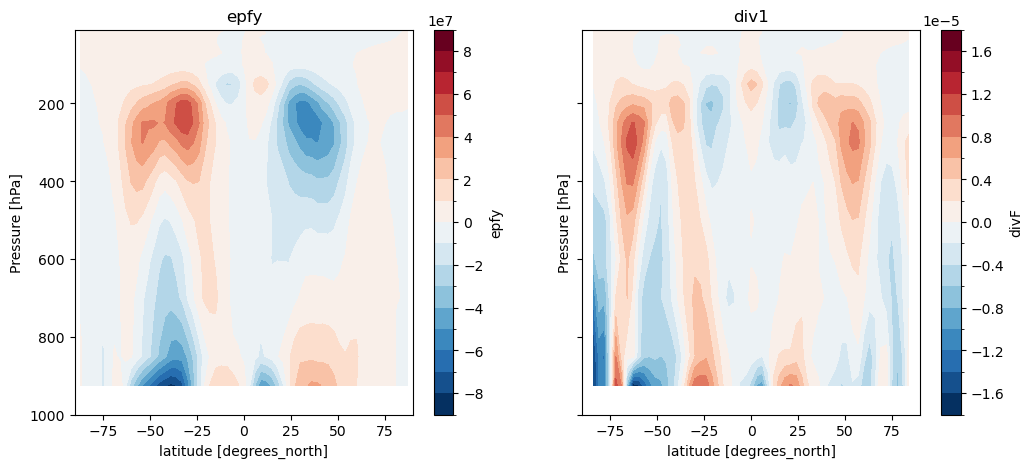

In [ ]:
# # import data and do preliminary alterations
# e3sm_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/E3SMv1/*.nc', 
#                                 parallel=True)
# e3sm_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/ua/E3SMv1/*.nc', 
#                                 parallel=True)
# e3sm_epfy = e3sm_epfy.isel(longitude=0)
# epfy = e3sm_epfy.rename({'latitude': 'lat'})
# ua = e3sm_ua.rename({'latitude': 'lat'})

# # sort out time by converting required datasets to cftime.NoLeap
# # and ensure both vars have same date and time for monthly data
# ua = ua.convert_calendar('noleap')

# # Extract the time component
# times_ua = ua['time'].values
# times_epfy = epfy['time'].values

# # Function to change a date to the first of the month
# def to_first_of_month(date):
#     return cftime.DatetimeNoLeap(date.year, date.month, 1, 0, date.minute, date.second, date.microsecond, calendar=date.calendar)

# # Apply the function to all dates
# new_times_ua = [to_first_of_month(t) for t in times_ua]
# new_times_epfy = [to_first_of_month(t) for t in times_epfy]

# # Replace the original time component with the new times
# ua['time'] = new_times_ua
# epfy['time'] = new_times_epfy

# # create dataset and interpolate
# e3sm_ds = xr.Dataset( {'ubar': ua.U.mean('longitude'), 'epfy': epfy.EPYpe})
# e3sm_ds = e3sm_ds.interp(lat=np.arange(-90,93,3))
# # subset epfy to match SRIP datasets
# e3sm_ds = e3sm_ds.where(e3sm_ds.level < 1000.)
# e3sm_ds = e3sm_ds.where(e3sm_ds.level > 1.)
# e3sm_ds = e3sm_ds.where(e3sm_ds.lat > -90.)
# e3sm_ds = e3sm_ds.where(e3sm_ds.lat < 90)

# # calculate divF
# e3sm_ds = ef.calculate_divFphi(e3sm_ds)
# e3sm_ds.to_netcdf('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/E3SMv1_ua_epfy_divF_r200_3x3.nc')
e3sm_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/E3SMv1_ua_epfy_divF_r200_3x3.nc')

# calculate EFP
e3sm_efp = ef.calculate_efp_pamip(e3sm_ds, usual_mean=False)
e3sm_efp_south = ef.calculate_efp_pamip(e3sm_ds, calc_south_hemis=True, usual_mean=False)
print(f'E3SMv1 DJF Feedback: {e3sm_efp}')
print(f'E3SMv1 JAS Feedback: {e3sm_efp_south}')

# plot original variables
e3sm_ds1 = e3sm_ds.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
e3sm_ds1.epfy.mean('time').plot.contourf(ax=ax1, levels=20, yincrease=False)
e3sm_ds1.divF.mean('time').plot.contourf(ax=ax2, levels=20, yincrease=False)
ax1.set_title('epfy')
ax2.set_title('div1')
plt.show()

### ECHAM6.3 (AWI)

In [10]:
awi_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/ECHAM6.3_AWI/*.nc', 
                        combine='nested', concat_dim='ens_ax', parallel=True)
awi_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/ua/ECHAM6.3_AWI/*.nc', 
                        combine='nested', concat_dim='ens_ax', parallel=True)


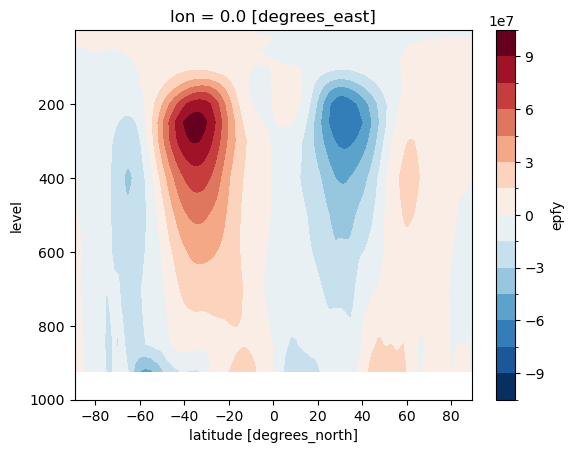

In [ ]:
# awi_epfy = awi_epfy.rename({'plev': 'level'})
# awi_epfy['level'] = awi_epfy['level'] / 100

# awi_epfy = awi_epfy.where(awi_epfy.level < 1000.)
# awi_epfy = awi_epfy.where(awi_epfy.level > 1.)
# awi_epfy = awi_epfy.where(awi_epfy.lat > -90.)
# awi_epfy = awi_epfy.where(awi_epfy.lat < 90)

# awi_epfy.epfy.isel(lon=0).mean(('time', 'ens_ax')).plot.contourf(levels=20, yincrease=False)

In [11]:
awi_epfy = awi_epfy.isel(lon=0)
awi_epfy = awi_epfy.rename({'plev': 'level'})
awi_ua = awi_ua.rename({'plev': 'level'})

# match pressure levels to smaller dataset
if len(awi_epfy.level) > len(awi_ua.level):
    awi_epfy = awi_epfy.sel( level = awi_ua.level.values )
else:
    awi_ua = awi_ua.sel( level = awi_epfy.level.values )
    
# Convert datetime to cftime, if required
if not isinstance(awi_ua.time.values[0], cftime.DatetimeNoLeap):
    awi_ua = awi_ua.convert_calendar('noleap')
if not isinstance(awi_epfy.time.values[0], cftime.DatetimeNoLeap):
    awi_epfy = awi_epfy.convert_calendar('noleap')
    
# Extract the time component
times_ua = awi_ua['time'].values
times_epfy = awi_epfy['time'].values

# Function to change a date to the first of the month
def to_first_of_month(date):
    return cftime.DatetimeNoLeap(date.year, date.month, 1, 0, 0, date.second, date.microsecond, calendar=date.calendar)

# Apply the function to all dates
new_times_ua = [to_first_of_month(t) for t in times_ua]
new_times_epfy = [to_first_of_month(t) for t in times_epfy]

# Replace the original time component with the new times
awi_ua['time'] = new_times_ua
awi_epfy['time'] = new_times_epfy

# remove spin-up on epfy
awi_epfy = awi_epfy.sel(time=slice('2000-06', '2001-05'))

# change chunks
awi_ua = awi_ua.chunk({'ens_ax':50, 'lat':96, 'time': 12, 'level':19})
awi_epfy = awi_epfy.chunk({'ens_ax':50, 'lat':96, 'time': 12, 'level':19})
    
awi_ds = xr.Dataset( {'ubar': awi_ua.ua.mean('lon'), 'epfy': awi_epfy.epfy})
awi_ds = awi_ds.interp(lat=np.arange(-90,93,3))
# subset epfy to match SRIP datasets
awi_ds['level'] = awi_ds['level'] / 100
awi_ds = awi_ds.where(awi_ds.level < 1000.)
awi_ds = awi_ds.where(awi_ds.level > 1.)
awi_ds = awi_ds.where(awi_ds.lat > -90.)
awi_ds = awi_ds.where(awi_ds.lat < 90)

# calculate divF
awi_ds = ef.calculate_divFphi(awi_ds)
awi_ds

<xarray.Dataset>
Dimensions:  (ens_ax: 100, time: 12, level: 19, lat: 61)
Coordinates:
  * time     (time) object 2000-06-01 00:00:00 ... 2001-05-01 00:00:00
  * level    (level) float64 1e+03 925.0 850.0 700.0 600.0 ... 20.0 10.0 5.0 1.0
    lon      float64 0.0
  * lat      (lat) int64 -90 -87 -84 -81 -78 -75 -72 ... 72 75 78 81 84 87 90
Dimensions without coordinates: ens_ax
Data variables:
    ubar     (ens_ax, time, level, lat) float32 dask.array<chunksize=(50, 12, 19, 61), meta=np.ndarray>
    epfy     (ens_ax, time, level, lat) float64 dask.array<chunksize=(50, 12, 19, 61), meta=np.ndarray>
    divF     (ens_ax, time, level, lat) float64 nan nan nan nan ... nan nan nan

ECHAM6.3_AWI DJF Feedback: 0.0132
ECHAM6.3_AWI JAS Feedback: 0.0097


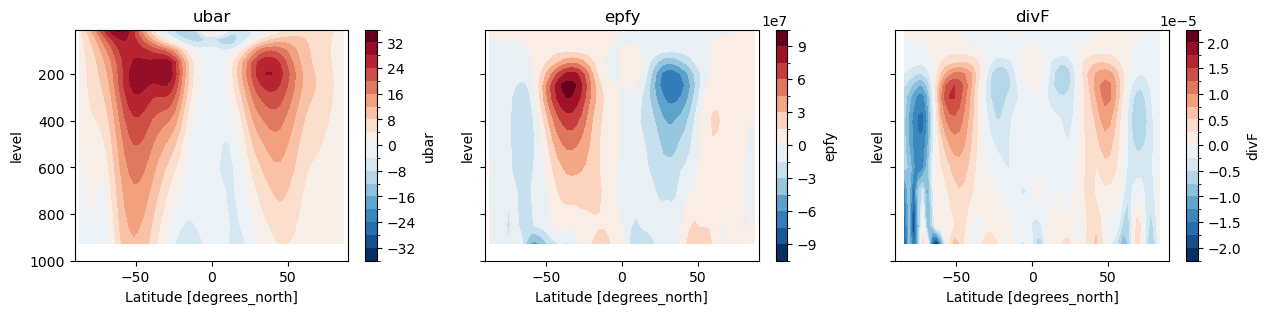

In [12]:
# awi_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/ECHAM6.3_AWI_ua_epfy_divF_r200_3x3.nc')

# calculate EFP
awi_efp = ef.calculate_efp_pamip(awi_ds)
awi_efp_south = ef.calculate_efp_pamip(awi_ds, calc_south_hemis=True)
print(f'ECHAM6.3_AWI DJF Feedback: {awi_efp}')
print(f'ECHAM6.3_AWI JAS Feedback: {awi_efp_south}')

# plot original variables
awi_ds1 = awi_ds.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,3))
awi_ds1.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
awi_ds1.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
awi_ds1.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

# HadGEM3-GC31

### HadGEM3-GC31-MM

Can handle with standard function.

In [49]:
hadMM_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/HadGEM3-GC31-MM/*.nc',
                              combine='nested', concat_dim='ens_ax', parallel=True)
hadMM_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/ua/HadGEM3-GC31-MM/*.nc',
                              combine='nested', concat_dim='ens_ax', parallel=True)

### HadGEM3-GC31-LL

In [3]:
hadLL_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/HadGEM3-GC31-LL/*.nc',
                              combine='nested', concat_dim='ens_ax', parallel=True)
hadLL_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/ua/HadGEM3-GC31-LL/*.nc',
                              combine='nested', concat_dim='ens_ax', parallel=True)

In [4]:
hadLL_epfy

<xarray.Dataset>
Dimensions:    (time: 12, lat: 145, level: 19, ens_ax: 100, bnds: 2)
Coordinates:
  * time       (time) object 2000-04-16 00:00:00 ... 2001-03-16 00:00:00
    longitude  float32 358.1
  * lat        (lat) float32 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Dimensions without coordinates: ens_ax, bnds
Data variables:
    t_bnds     (ens_ax, time, bnds) object dask.array<chunksize=(1, 12, 2), meta=np.ndarray>
    vtem       (ens_ax, time, level, lat) float32 dask.array<chunksize=(1, 12, 19, 145), meta=np.ndarray>
    epfy       (ens_ax, time, level, lat) float32 dask.array<chunksize=(1, 12, 19, 145), meta=np.ndarray>
    epfz       (ens_ax, time, level, lat) float32 dask.array<chunksize=(1, 12, 19, 145), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Aug 13 18:27:53 2020: cdo monmean pdSST-pdSIC/r001i1p1f...
    NCO:          netCDF Operators version 4.7.5 (Homepage = http://nco.sf.ne...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [5]:
hadLL_ua

<xarray.Dataset>
Dimensions:      (longitude: 192, latitude: 144, hybrid_ht: 85, t: 14,
                  surface: 1, toa: 1, ht: 1, level275: 1, longitude_1: 192,
                  latitude_1: 145, level6: 4, msl: 1, longitude_2: 360,
                  latitude_2: 180, p_1: 19, ens_ax: 12)
Coordinates: (12/15)
  * longitude    (longitude) float32 0.9375 2.812 4.688 ... 355.3 357.2 359.1
  * latitude     (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * hybrid_ht    (hybrid_ht) float32 20.0 53.33 100.0 ... 7.91e+04 8.5e+04
  * t            (t) object 2000-04-16 00:00:00 ... 2001-05-16 00:00:00
  * surface      (surface) float32 0.0
  * toa          (toa) float32 0.0
    ...           ...
  * latitude_1   (latitude_1) float32 -90.0 -88.75 -87.5 ... 87.5 88.75 90.0
  * level6       (level6) float32 0.05 0.225 0.675 2.0
  * msl          (msl) float32 0.0
  * longitude_2  (longitude_2) float32 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * latitude_2   (latitude_2) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * p_1          (p_1) float32 1e+03 925.0 850.0 700.0 ... 20.0 10.0 5.0 1.0
Dimensions without coordinates: ens_ax
Data variables: (12/58)
    theta        (ens_ax, t, hybrid_ht, latitude, longitude) float32 dask.array<chunksize=(1, 14, 85, 144, 192), meta=np.ndarray>
    temp         (ens_ax, t, surface, latitude, longitude) float32 dask.array<chunksize=(1, 14, 1, 144, 192), meta=np.ndarray>
    iceconc      (ens_ax, t, surface, latitude, longitude) float32 dask.array<chunksize=(1, 14, 1, 144, 192), meta=np.ndarray>
    icedepth     (ens_ax, t, surface, latitude, longitude) float32 dask.array<chunksize=(1, 14, 1, 144, 192), meta=np.ndarray>
    temp_1       (ens_ax, t, surface, latitude, longitude) float32 dask.array<chunksize=(1, 14, 1, 144, 192), meta=np.ndarray>
    temp_2       (ens_ax, t, surface, latitude, longitude) float32 dask.array<chunksize=(1, 14, 1, 144, 192), meta=np.ndarray>
    ...           ...
    field1903    (ens_ax, t, surface, latitude_2, longitude_2) float32 dask.array<chunksize=(1, 14, 1, 180, 360), meta=np.ndarray>
    field1901    (ens_ax, t, surface, latitude, longitude) float32 dask.array<chunksize=(1, 14, 1, 144, 192), meta=np.ndarray>
    u            (ens_ax, t, p_1, latitude_1, longitude_1) float32 dask.array<chunksize=(1, 14, 19, 145, 192), meta=np.ndarray>
    temp_4       (ens_ax, t, p_1, latitude_1, longitude_1) float32 dask.array<chunksize=(1, 14, 19, 145, 192), meta=np.ndarray>
    ht_1         (ens_ax, t, p_1, latitude_1, longitude_1) float32 dask.array<chunksize=(1, 14, 19, 145, 192), meta=np.ndarray>
    unspecified  (ens_ax, t, p_1, latitude_1, longitude_1) float32 dask.array<chunksize=(1, 14, 19, 145, 192), meta=np.ndarray>
Attributes:
    history:  Mon Nov 11 16:04:45 GMT 2019 - CONVSH V1.93 13-October-2015

### IPSL-CM6A-LR

IPSL-CM6A-LR DJF Feedback: 0.3099
IPSL-CM6A-LR JAS Feedback: 0.2262


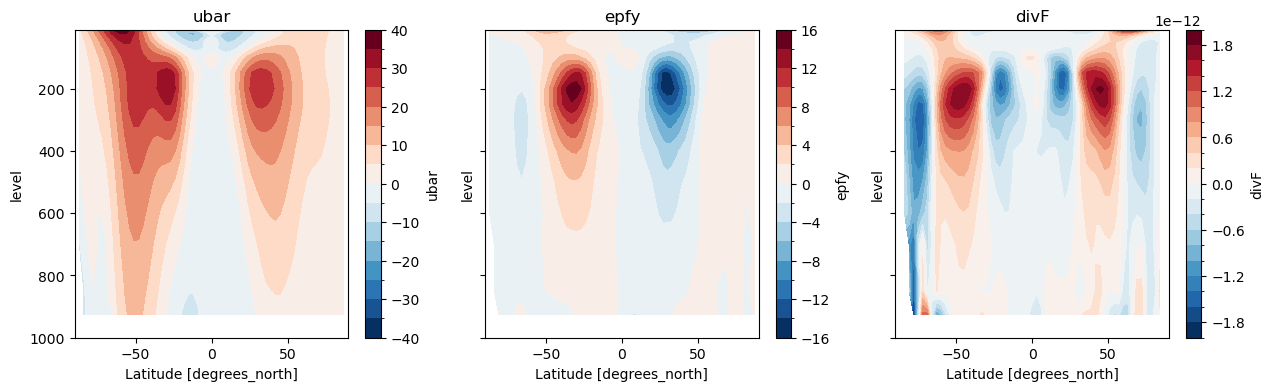

In [ ]:
# ipsl_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/IPSL-CM6A-LR/*.nc',
#                               parallel=True, chunks={'time': 12})
# ipsl_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/ua/IPSL-CM6A-LR/*.nc',
#                               parallel=True, chunks={'time': 12})
# ipsl_epfy['time'] = ipsl_ua.time
# ipsl_epfy.attrs = {}
# ipsl_epfy = ipsl_epfy.rename({'record': 'ens_ax'})
# ipsl_ua = ipsl_ua.rename({'plev': 'level', 'record': 'ens_ax'})
# ipsl_ua['level'] = ipsl_ua.level / 100

# # match pressure levels to smaller dataset
# if len(ipsl_epfy.level) > len(ipsl_ua.level):
#     ipsl_epfy = ipsl_epfy.sel( level = ipsl_ua.level.values )
# else:
#     ipsl_ua = ipsl_ua.sel( level = ipsl_epfy.level.values )
    
# # create dataset and slice to remove spin-up
# ipsl_ds = xr.Dataset( {'ubar': ipsl_ua.ua.mean('lon'), 'epfy': ipsl_epfy.epfy})
# ipsl_ds = ipsl_ds.interp(lat=np.arange(-90,93,3))
# ipsl_ds = ipsl_ds.sel(time=slice('2000-06', '2001-05'))

# # subset epfy to match SRIP datasets
# ipsl_ds = ipsl_ds.where(ipsl_ds.level < 1000.)
# ipsl_ds = ipsl_ds.where(ipsl_ds.level > 1.)
# ipsl_ds = ipsl_ds.where(ipsl_ds.lat > -90.)
# ipsl_ds = ipsl_ds.where(ipsl_ds.lat < 90)

# # calculate divF
# ipsl_ds = ef.calculate_divFphi(ipsl_ds)
# ipsl_ds.to_netcdf('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/IPSL-CM6A-LR_ua_epfy_divF_r200_3x3.nc')

ipsl_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/IPSL-CM6A-LR_ua_epfy_divF_r200_3x3.nc',
                            parallel=True, chunks={'time':12, 'ens_ax':50})

# calculate EFP
ipsl_efp = ef.calculate_efp_pamip(ipsl_ds)
ipsl_efp_south = ef.calculate_efp_pamip(ipsl_ds, calc_south_hemis=True)
print(f'IPSL-CM6A-LR DJF Feedback: {ipsl_efp}')
print(f'IPSL-CM6A-LR JAS Feedback: {ipsl_efp_south}')

# plot original variables
ipsl = ipsl_ds.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,4))
ipsl.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
ipsl.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
ipsl.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

# OpenIFS

### OpenIFS-159

t159-CM6A-LR DJF Feedback: 0.3636
t159-CM6A-LR JAS Feedback: 0.3588


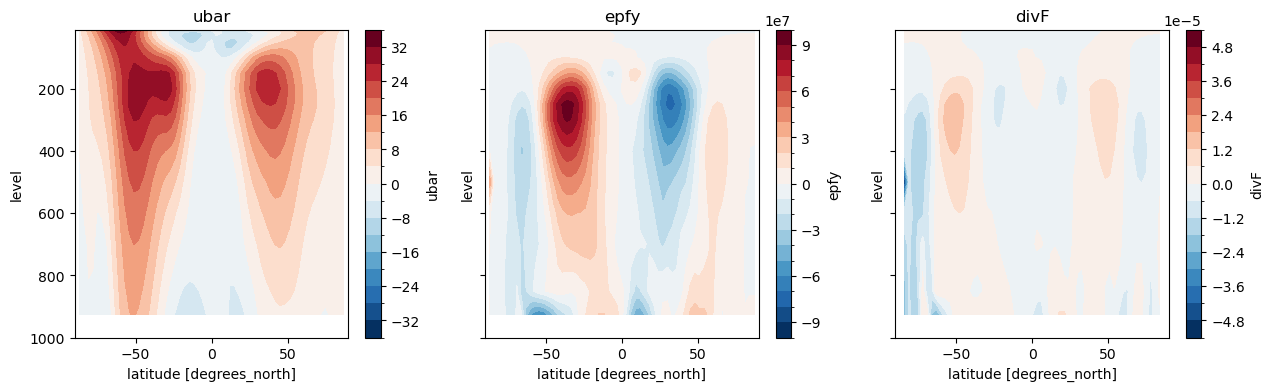

In [ ]:
# t159_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/OpenIFS-159/temnwa*.nc',
#                          combine='nested', concat_dim='ens_ax', parallel=True)
# t159_ds = t159_ds[['ua', 'epfy']].mean('lon')
# t159_ds = t159_ds.rename({'plev': 'level', 'ua':'ubar'})
# t159_ds['level'] = t159_ds['level'] / 100

# # create dataset and slice to remove spin-up
# t159_ds = t159_ds.interp(lat=np.arange(-90,93,3))
# t159_ds = t159_ds.sel(time=slice('2000-06', '2001-05'))

# # subset epfy to match SRIP datasets
# t159_ds = t159_ds.where(t159_ds.level < 1000.)
# t159_ds = t159_ds.where(t159_ds.level > 1.)
# t159_ds = t159_ds.where(t159_ds.lat > -90.)
# t159_ds = t159_ds.where(t159_ds.lat < 90)

# # calculate divF
# t159_ds = ef.calculate_divFphi(t159_ds)
# t159_ds.to_netcdf('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/OpenIFS-T159_ua_epfy_divF_r300_3x3.nc')
t159_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/OpenIFS-159*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})

t159_efp = ef.calculate_efp_pamip(t159_ds)
t159_efp_south = ef.calculate_efp_pamip(t159_ds, calc_south_hemis=True)
print(f't159-CM6A-LR DJF Feedback: {t159_efp}')
print(f't159-CM6A-LR JAS Feedback: {t159_efp_south}')

# plot original variables
t159 = t159_ds.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,4))
t159.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
t159.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
t159.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### OpenIFS-1279

In [5]:
# t511_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/OpenIFS-511/temnwa*.nc',
#                          combine='nested', concat_dim='ens_ax', parallel=True)

# t511_ds = t511_ds[['ua', 'epfy']].mean('lon')
# t511_ds = t511_ds.rename({'plev': 'level', 'ua':'ubar'})
# t511_ds['level'] = t511_ds['level'] / 100

# # create dataset and slice to remove spin-up
# t511_ds = t511_ds.interp(lat=np.arange(-90,93,3))
# t511_ds = t511_ds.sel(time=slice('2000-06', '2001-05'))

# # subset epfy to match SRIP datasets
# t511_ds = t511_ds.where(t511_ds.level < 1000.)
# t511_ds = t511_ds.where(t511_ds.level > 1.)
# t511_ds = t511_ds.where(t511_ds.lat > -90.)
# t511_ds = t511_ds.where(t511_ds.lat < 90)

# # # calculate divF
# t511_ds = ef.calculate_divFphi(t511_ds)
# t511_ds.to_netcdf('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/OpenIFS-511_ua_epfy_divF_r100_3x3.nc')
# t511_ds

t511_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/1.1_pdSST-pdSIC/OpenIFS-511*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
t511_ds

<xarray.Dataset>
Dimensions:  (ens_ax: 99, time: 12, level: 19, lat: 61)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-15T21:00:00 ... 2001-05-16T09:00:00
  * level    (level) float64 1e+03 925.0 850.0 700.0 600.0 ... 20.0 10.0 5.0 1.0
  * lat      (lat) int64 -90 -87 -84 -81 -78 -75 -72 ... 72 75 78 81 84 87 90
Dimensions without coordinates: ens_ax
Data variables:
    ubar     (ens_ax, time, level, lat) float64 dask.array<chunksize=(50, 12, 19, 61), meta=np.ndarray>
    epfy     (ens_ax, time, level, lat) float64 dask.array<chunksize=(50, 12, 19, 61), meta=np.ndarray>
    divF     (ens_ax, time, level, lat) float64 dask.array<chunksize=(50, 12, 19, 61), meta=np.ndarray>

In [ ]:

t511_efp = ef.calculate_efp_pamip(t511_ds)
t511_efp_south = ef.calculate_efp_pamip(t511_ds, calc_south_hemis=True)
print(f't511-CM6A-LR DJF Feedback: {t511_efp}')
print(f't511-CM6A-LR JAS Feedback: {t511_efp_south}')

# plot original variables
t511 = t511_ds.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,4))
t511.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
t511.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
t511.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
ax1.set_title('ubar')
ax2.set_title('epfy')
ax3.set_title('divF')
plt.show()

### OpenIFS-1279

cba.

In [ ]:
t1279_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/OpenIFS-1279/temnwa*.nc',
                         combine='nested', concat_dim='ens_ax', parallel=True)

# t1279_ds = t1279_ds[['ua', 'epfy']].mean('lon')
# t1279_ds = t1279_ds.rename({'plev': 'level', 'ua':'ubar'})
# t1279_ds['level'] = t1279_ds['level'] / 100

# # create dataset and slice to remove spin-up
# t1279_ds = t1279_ds.interp(lat=np.arange(-90,93,3))
# t1279_ds = t1279_ds.sel(time=slice('2000-06', '2001-05'))

# # subset epfy to match SRIP datasets
# t1279_ds = t1279_ds.where(t1279_ds.level < 1000.)
# t1279_ds = t1279_ds.where(t1279_ds.level > 1.)
# t1279_ds = t1279_ds.where(t1279_ds.lat > -90.)
# t1279_ds = t1279_ds.where(t1279_ds.lat < 90)

# # # calculate divF
# t1279_ds = ef.calculate_divFphi(t1279_ds)

# t1279_ds.to_netcdf('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/OpenIFS-1279_ua_epfy_divF_r100_3x3.nc')
t1279_ds

# t511_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/OpenIFS-511*.nc',
#                            parallel=True, chunks={'time':12, 'ens_ax':50})

# t511_efp = ef.calculate_efp_pamip(t511_ds)
# t511_efp_south = ef.calculate_efp_pamip(t511_ds, calc_south_hemis=True)
# print(f't511-CM6A-LR DJF Feedback: {t511_efp}')
# print(f't511-CM6A-LR JAS Feedback: {t511_efp_south}')

# # plot original variables
# t511 = t511_ds.sel(level=slice(1000,10))     # Pa
# fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,4))
# t511.ubar.mean(('time', 'ens_ax')).plot.contourf(ax=ax1, levels=20, yincrease=False)
# t511.epfy.mean(('time', 'ens_ax')).plot.contourf(ax=ax2, levels=20, yincrease=False)
# t511.divF.mean(('time', 'ens_ax')).plot.contourf(ax=ax3, levels=20, yincrease=False)
# ax1.set_title('ubar')
# ax2.set_title('epfy')
# ax3.set_title('divF')
# plt.show()

<xarray.Dataset>
Dimensions:     (time: 2, ens_ax: 20, bnds: 2, lon: 1, lat: 480, plev: 19)
Coordinates:
  * time        (time) datetime64[ns] 2000-04-16 2000-05-16T09:00:00
  * lon         (lon) float64 0.0
  * lat         (lat) float64 -89.81 -89.44 -89.06 -88.69 ... 89.06 89.44 89.81
  * plev        (plev) float64 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
Dimensions without coordinates: ens_ax, bnds
Data variables: (12/15)
    time_bnds   (ens_ax, time, bnds) datetime64[ns] dask.array<chunksize=(1, 2, 2), meta=np.ndarray>
    va          (ens_ax, time, plev, lat, lon) float64 dask.array<chunksize=(1, 2, 19, 480, 1), meta=np.ndarray>
    wa          (ens_ax, time, plev, lat, lon) float64 dask.array<chunksize=(1, 2, 19, 480, 1), meta=np.ndarray>
    utendepfdy  (ens_ax, time, plev, lat, lon) float64 dask.array<chunksize=(1, 2, 19, 480, 1), meta=np.ndarray>
    utendepfdz  (ens_ax, time, plev, lat, lon) float64 dask.array<chunksize=(1, 2, 19, 480, 1), meta=np.ndarray>
    ta          (ens_ax, time, plev, lat, lon) float64 dask.array<chunksize=(1, 2, 19, 480, 1), meta=np.ndarray>
    ...          ...
    psitem      (ens_ax, time, plev, lat, lon) float64 dask.array<chunksize=(1, 2, 19, 480, 1), meta=np.ndarray>
    epfy        (ens_ax, time, plev, lat, lon) float64 dask.array<chunksize=(1, 2, 19, 480, 1), meta=np.ndarray>
    epfz        (ens_ax, time, plev, lat, lon) float64 dask.array<chunksize=(1, 2, 19, 480, 1), meta=np.ndarray>
    utendvtem   (ens_ax, time, plev, lat, lon) float64 dask.array<chunksize=(1, 2, 19, 480, 1), meta=np.ndarray>
    utendwtem   (ens_ax, time, plev, lat, lon) float64 dask.array<chunksize=(1, 2, 19, 480, 1), meta=np.ndarray>
    utendepfd   (ens_ax, time, plev, lat, lon) float64 dask.array<chunksize=(1, 2, 19, 480, 1), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 1.9.5 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Mon Jan 18 16:32:51 2021: cdo monmean /p/largedata/hhb19/js...
    frequency:    mon
    CDO:          Climate Data Operators version 1.9.5 (http://mpimet.mpg.de/...

# CESM1-WACCM-SC

CESM1-WACCM-SC DJF Feedback: 0.1352
CESM1-WACCM-SC JAS Feedback: 0.0308


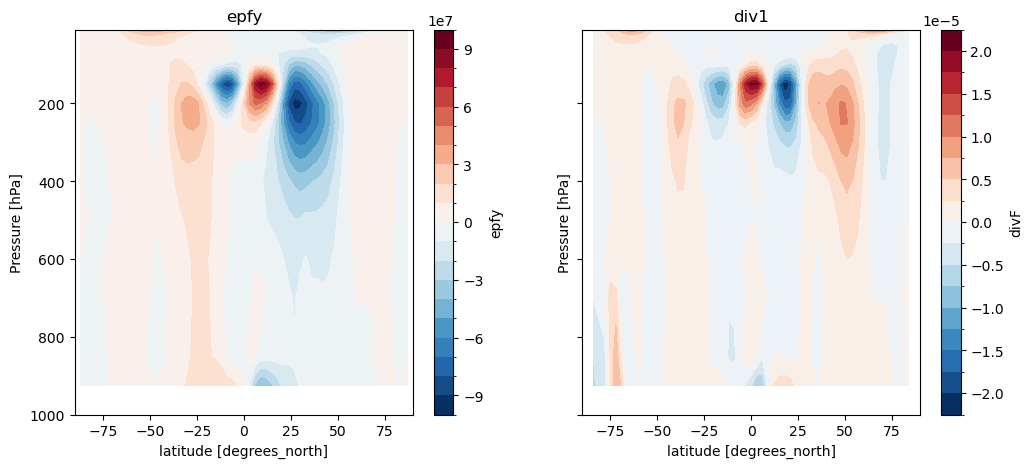

In [ ]:
# # import data and make preliminary changes
# cesm1_epfy = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/epfy/CESM1-WACCM-SC/EPY_redate_mon_PAMIP-1.1-QBO_300m_sub.nc')
# cesm1_ua = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/monthly/pdSST-pdSIC/ua/CESM1-WACCM-SC/U_redate_zonmean_1700-2000_sub_1.1.nc')
# cesm1_ua.attrs, cesm1_epfy.attrs = {}, {}
# cesm1_epfy, cesm1_ua = cesm1_epfy.isel(lon=0), cesm1_ua.isel(lon=0)
# cesm1_ua, cesm1_epfy = cesm1_ua.convert_calendar('noleap'), cesm1_epfy.convert_calendar('noleap')

# # create dataset and interpolate
# cesm1_ds = xr.Dataset( {'ubar': cesm1_ua.U, 'epfy': cesm1_epfy.EPY})
# cesm1_ds = cesm1_ds.interp(lat=np.arange(-90,93,3))
# # subset epfy to match SRIP datasets
# cesm1_ds = cesm1_ds.where(cesm1_ds.level < 1000.)
# cesm1_ds = cesm1_ds.where(cesm1_ds.level > 1.)
# cesm1_ds = cesm1_ds.where(cesm1_ds.lat > -90.)
# cesm1_ds = cesm1_ds.where(cesm1_ds.lat < 90)

# # calculate divF
# cesm1_ds = ef.calculate_divFphi(cesm1_ds)
# cesm1_ds.to_netcdf('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CESM1-WACCM-SC_ua_epfy_divF_r300_3x3.nc')
# cesm1_ds

cesm1_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CESM1-WACCM-SC_ua_epfy_divF_r300_3x3.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})

# calculate EFP
cesm1_efp = ef.calculate_efp_pamip(cesm1_ds, usual_mean=False)
cesm1_efp_south = ef.calculate_efp_pamip(cesm1_ds, calc_south_hemis=True, usual_mean=False)
print(f'CESM1-WACCM-SC DJF Feedback: {cesm1_efp}')
print(f'CESM1-WACCM-SC JAS Feedback: {cesm1_efp_south}')

# plot original variables
cesm1_ds1 = cesm1_ds.sel(level=slice(1000,10))     # Pa
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
cesm1_ds1.epfy.mean('time').plot.contourf(ax=ax1, levels=20, yincrease=False)
cesm1_ds1.divF.mean('time').plot.contourf(ax=ax2, levels=20, yincrease=False)
ax1.set_title('epfy')
ax2.set_title('div1')
plt.show()